# Image analysis 
   - Thresholding approach  
   - local binary pattern - to identify the maximum of thresh holding to get cover up maximum intenshity 
   - otsu thresholding method
   - K-means to iden 

# Local binary pattern idetification 

Basic 3 * 3 pattern 

we are taking 8 pixels such as 

     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
   
   
 Since pattern matching is using a binary scheme/methodology , this process is called binary pattern matching. 
 The lbp values we are gathering after the calculation shows the intesity of the of the each color represent in
 the picture and the scales are round up to the 256
 
     intesity to 256
     
     ^
     |
     |
     |_________ >  
         color scheme
         
From this intensity we can identify intensities
- set of rangers which the  object lies
- assign rangers
- identify percentages 

## Reason to use lbp 
LBP will divide the image to some areas and count the density of the gradient in every areas then process it to histogram.
<img src="projectProposalAgr935.png" alt="gradient.jpg" width="500"/>
   
## Special remarks 
- Difference betweem brown and green color 
- Identify what intensities would cover maxmimum thresh and Identfy the middle ground to identify the canopy of each picture

## Why 
- Each picture the green image values can be vary according to the picture you took from the compuer 
- So if we isolate each cluster we can identfy the real portions of the canopy and ignore the rest of the data


 

In [81]:
#import libraries
from skimage import data, io, filters,exposure,img_as_float
from skimage.color import rgb2gray
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
import numpy as np
from matplotlib import pyplot as plt

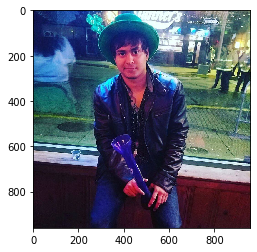

In [109]:
# arrange imags
directory = 'canopyPics/'
image_url =  directory +'ginipig.JPG'
image_url =  directory + 'squre.png'
image_url =  directroy + 'bluegray.png'
image_url =  directroy + 'dishan.jpg'
image     = io.imread(image_url)
plt.imshow(image)

In [108]:
# Get pixel values
def getPixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def calcualte_ldp(img, x, y):   
    centerCell = img[x][y]
    grid = []
    grid.append(getPixel(img, centerCell, x-1, y+1))     # top_right
    grid.append(getPixel(img, centerCell, x, y+1))       # right
    grid.append(getPixel(img, centerCell, x+1, y+1))     # bottom_right
    grid.append(getPixel(img, centerCell, x+1, y))       # bottom
    grid.append(getPixel(img, centerCell, x+1, y-1))     # bottom_left
    grid.append(getPixel(img, centerCell, x, y-1))       # left
    grid.append(getPixel(img, centerCell, x-1, y-1))     # top_left
    grid.append(getPixel(img, centerCell, x-1, y))       # top
    
    binary_pattern = [1, 2, 4, 8, 16, 32, 64, 128] # 1 to 8
    count = 0
    for i in range(len(grid)):
        count += grid[i] * binary_pattern[i]
    return count    


LBP calculated .


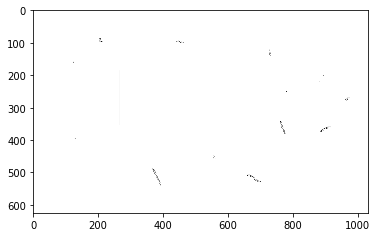

In [96]:
# output
# creating 3 output

# 1. image  gray
# 2. image  img_lbp
# 3. image  histomgram 

img_bgr    = image
plt.imshow(img_bgr)
height, width, channel = img_bgr.shape
img_gray   = rgb2gray(image)
plt.imshow(img_gray)
img_lbp    = np.zeros((height, width,3), np.uint8)
    
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = calcualte_ldp(img_gray, i, j) # Calculate the maximum value 
        
print("LBP calculated .")

plt.imshow(img_lbp)


## Below code is only about getting histograms of a picture##

# Using Local binary function in the thresh holds

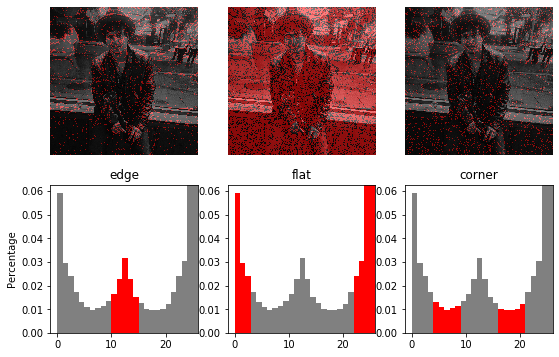

In [110]:
# settings for LBP
radius = 3
n_points = 8 * radius

def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r') # setting the color to red 

METHOD = "uniform"
image = rgb2gray(image)
lbp = local_binary_pattern(image, n_points, radius, METHOD)

def hist(ax, lbp):
    n_bins = int(lbp.max() + 1) # setting the max of intervel shold be bigger that most ldp and lower than 255
    # ravel = lbp.ravel -> take them all to a  one array
    # bins -> intervals 
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray() # set the color map to gray
#plt.imshow(image)

titles = ('edge', 'flat', 'corner') 
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)


for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')
    


TypeError: Image data of dtype object cannot be converted to float

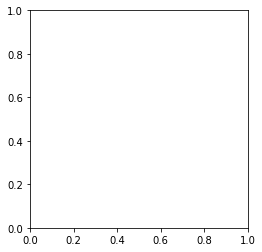

In [103]:
plt.imshow(fig)

# Deep analysis on image by using threshholds

ValueError: Images of type float must be between -1 and 1.

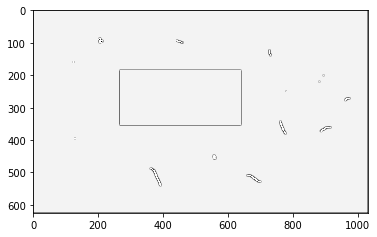

In [102]:
# bins : 256  : cut out interval 
def create_graphs(image, axes, bins=256):

    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

#*************************************************************************
#**************************************************************

# Load an example image

img  = rgb2gray(lbp)
plt.imshow(img)

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)

for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = create_graphs(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = create_graphs(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = create_graphs(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = create_graphs(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization') # used to improve contrast in images

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# SVM

In [19]:
from sklearn.model_selection import train_test_split 
import skimage.io as io
from skimage import data_dir
from matplotlib import pyplot as  plt
from sklearn import svm
import numpy as np
from skimage.color import rgb2gray 

In [4]:
X_train = io.ImageCollection("images/originalImages/*", conserve_memory=True)
y_train = io.ImageCollection("images/labelData/*", conserve_memory=True)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# dimentions 
print(X_train[0].shape)
print(X_test[0].shape)
print(y_train[0].shape)
print(y_test[0].shape)

print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)


(512, 512, 3)
(512, 512, 3)
(512, 512)
(512, 512)
(4, 512, 512, 3)
(2, 512, 512, 3)
(4, 512, 512)
(2, 512, 512)


In [5]:

#flatting data 3 dimentions image data

np_Xtrain = np.array(X_train)
print("X train start shape", np_Xtrain.shape)
X_train_flattened = np_Xtrain.reshape(-1, np_Xtrain.shape[-1])   
print("X train final shape",X_train_flattened.shape)

np_Xtest = np.array(X_test)
print("X test start shape", np_Xtest.shape)
np_Xtest_flattened = np_Xtest.reshape(-1, np_Xtest.shape[-1]) 
print("X test final shape", np_Xtest_flattened.shape)
        


X train start shape (4, 512, 512, 3)
X train final shape (1048576, 3)
X test start shape (2, 512, 512, 3)
X test final shape (524288, 3)


In [20]:
# Alternative gray scale 
xtogray = rgb2gray(X_train)

AttributeError: 'list' object has no attribute 'ndim'

In [6]:
#flatting data 1 dimention label data

np_ytrain = np.array(y_train)
y_train_ravel= np_ytrain.ravel()
y_train_flattened = y_train_ravel.reshape(-1,1)
print("y train final shape", y_train_flattened.shape)

np_ytest = np.array(y_test)
y_test_ravel =np_ytrain.ravel()  
y_test_flattened = y_test_ravel.reshape(-1,1)
print("y tst final shape",y_test_flattened.shape)



y train final shape (1048576, 1)
y tst final shape (1048576, 1)


In [8]:
# Cleaning data
# Remove zero (aka unknown as non values which the labeler coudnt identify)
y_train_flattened[y_train_flattened<1] = 2
y_test_flattened[y_test_flattened<1] = 2

X axis  (1048576, 3)
Y axis (1048576, 1)


ValueError: x and y must be the same size

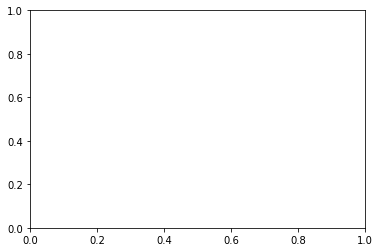

In [15]:
# scatter plot to visualize
print("X axis ", X_train_flattened.shape)
print("Y axis" ,y_train_flattened.shape)
#plt.scatter(X_train_flattened,y_train_flattened)


# Reshaping

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_flattened, y_train_flattened)

#Predict the response for test dataset
y_pred = clf.predict(X_test_flattened)

C:\Users\dishan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
for i in XX_test:    
    predy.append(gb.predict(i.reshape(1,-1)))

In [23]:
# Python code to demonstrate 
# to replace negative value with 0 
import numpy as np 

ini_array1 = np.array([1, 2, -3, 4, -5, -6]) 

# printing initial arrays 
print("initial array", ini_array1) 

# code to replace all negative value with 0 
ini_array1[ini_array1<0] = 0

# printing result 
print("New resulting array: ", ini_array1) 


initial array [ 1  2 -3  4 -5 -6]
New resulting array:  [1 2 0 4 0 0]
